In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from time import time
%matplotlib inline

/Users/shashankbhushan/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
train = pd.read_csv('Data/train.csv')
## Removing high leverage points - Doesnt seems to make a diff
##train = train[(train['loss'] <= 40000) & (train.cont7 > 0.1)]
test = pd.read_csv('Data/test.csv')

test['loss'] = np.nan
joined = pd.concat([train, test])

In [19]:
cont = [x for x in train.columns if 'cont' in x]
train[train.loss > 50000][cont+['loss']]

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
13030,0.368727,0.422197,0.944251,0.373816,0.281143,0.314937,1.000000,0.31796,0.40657,0.66076,0.997830,0.997416,0.093921,0.386355,51383.04
14969,0.474338,0.737068,0.944251,0.201989,0.281143,0.810769,1.000000,0.33372,0.41879,0.65072,0.998309,0.997975,0.241098,0.646015,85923.56
53551,0.316554,0.620805,0.944251,0.259793,0.281143,0.398017,1.000000,0.38885,0.30859,0.66572,0.985625,0.990604,0.129356,0.391758,121012.25
81475,0.712250,0.737068,0.527991,0.483397,0.560299,0.743786,0.999021,0.58934,0.74247,0.56081,0.934141,0.927650,0.342239,0.237954,67667.16
83871,0.316554,0.555782,0.944251,0.259793,0.281143,0.355523,1.000000,0.38318,0.30859,0.66572,0.985625,0.990604,0.117810,0.382908,106863.00
113176,0.335667,0.299102,0.865911,0.244390,0.281143,0.532941,1.000000,0.36636,0.24180,0.68997,0.990222,0.988736,0.157095,0.285224,59826.79
118666,0.637419,0.785784,0.884994,0.554673,0.560299,0.746021,0.999827,0.57187,0.58937,0.56081,0.967243,0.963339,0.279556,0.724137,51127.50
120773,0.256275,0.620805,0.901670,0.201989,0.281143,0.519747,0.999971,0.28768,0.31039,0.54983,0.932195,0.944062,0.151871,0.799338,57224.55
125668,0.637419,0.785784,0.928678,0.544560,0.577339,0.785401,0.999996,0.53046,0.58937,0.56081,0.993661,0.992625,0.279556,0.674005,67537.73
158777,0.779042,0.785784,0.819748,0.208655,0.281143,0.885839,1.000000,0.30260,0.81569,0.71323,0.995831,0.995104,0.437003,0.384334,54190.39


In [17]:
test[test.cont7 == 1][cont]

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
1077,0.422746,0.681761,0.745801,0.195483,0.281143,0.551912,1.0,0.27797,0.41675,0.57716,0.982449,0.980056,0.187450,0.384258
25000,0.777039,0.299102,0.484196,0.189137,0.281143,0.912747,1.0,0.30260,0.71250,0.68520,0.949450,0.973125,0.394923,0.214929
26937,0.474338,0.737068,0.944251,0.201989,0.281143,0.850340,1.0,0.31280,0.41879,0.65072,0.995054,0.997211,0.250991,0.385563
28877,0.368727,0.422197,0.944251,0.373816,0.281143,0.314937,1.0,0.31796,0.40657,0.66076,0.997830,0.997416,0.093921,0.708750
35916,0.739914,0.737068,0.944251,0.201989,0.281143,0.886905,1.0,0.31796,0.67504,0.65072,0.995054,0.997211,0.348267,0.379451
37142,0.733162,0.785784,0.944251,0.201989,0.281143,0.877751,1.0,0.31796,0.67504,0.65072,0.995054,0.997211,0.345247,0.217688
46717,0.733162,0.785784,0.944251,0.201989,0.281143,0.877751,1.0,0.31796,0.67504,0.65072,0.995054,0.997211,0.345247,0.793167
52216,0.316554,0.620805,0.944251,0.259793,0.281143,0.355523,1.0,0.38318,0.30859,0.66572,0.985625,0.990604,0.117810,0.794943
58280,0.475784,0.827585,0.944251,0.201989,0.281143,0.840349,1.0,0.31280,0.41879,0.70405,0.996082,0.995393,0.266328,0.708602
68353,0.316554,0.555782,0.944251,0.259793,0.281143,0.398017,1.0,0.38885,0.30859,0.66572,0.985625,0.990604,0.129356,0.213477


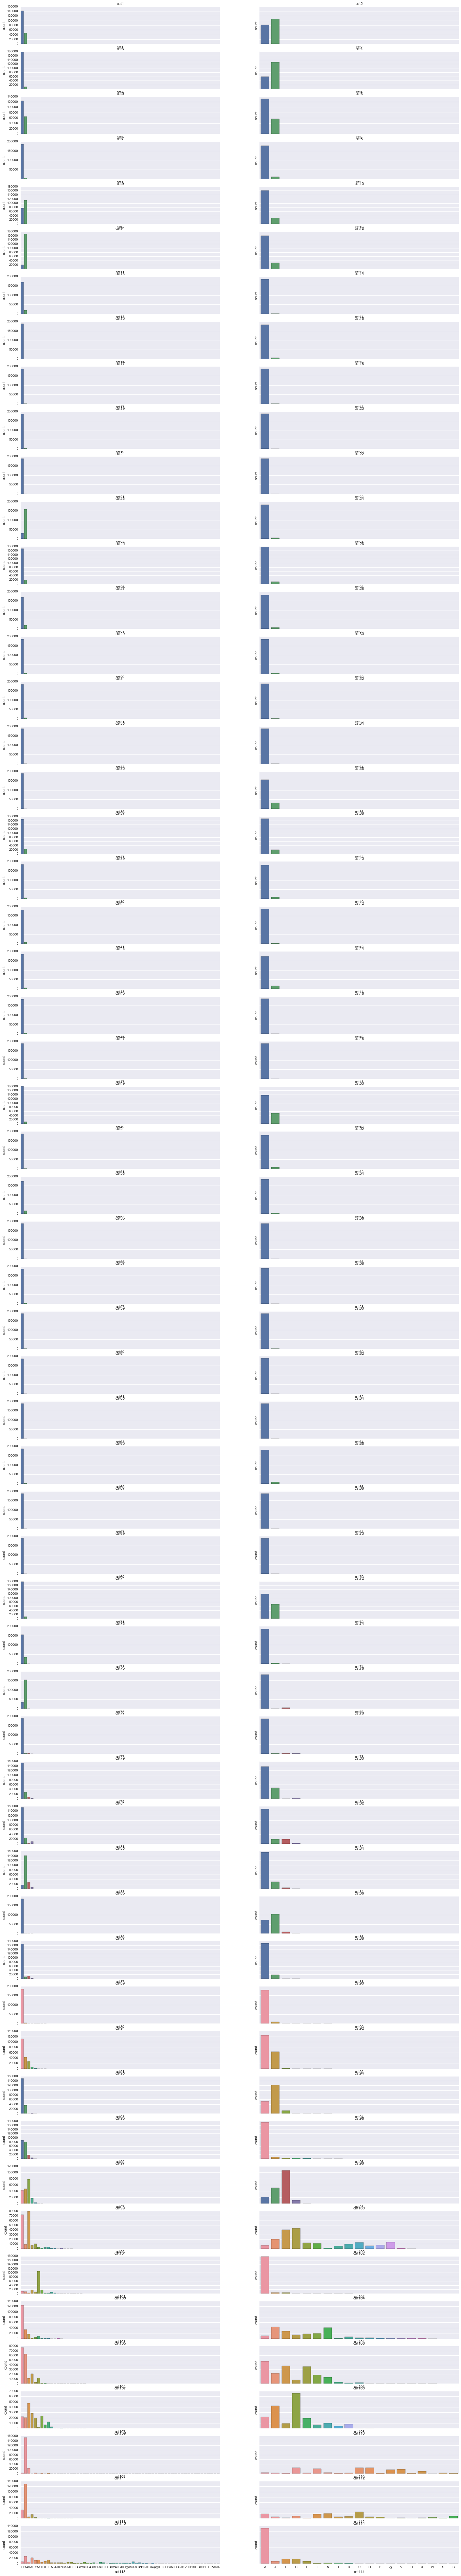

In [26]:
f, ax = plt.subplots(57, 2, sharex='col', sharey='row', figsize = (24,140))
f.figure
for i in range(57):
    sns.countplot(train['cat'+str(i*2+1)], ax=ax[i][0])
    sns.countplot(train['cat'+str(i*2+2)], ax=ax[i][1])

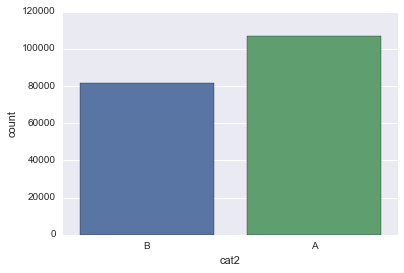

In [24]:
sns.countplot(train['cat2'])

In [22]:
train['cat2']

0         B
1         B
2         B
3         B
4         B
5         B
6         A
7         B
8         B
9         B
10        B
11        B
12        A
13        A
14        A
15        A
16        B
17        A
18        A
19        A
20        B
21        A
22        A
23        A
24        A
25        A
26        A
27        A
28        B
29        A
         ..
188288    A
188289    A
188290    A
188291    A
188292    A
188293    A
188294    A
188295    B
188296    A
188297    B
188298    A
188299    A
188300    A
188301    A
188302    A
188303    B
188304    A
188305    A
188306    B
188307    A
188308    A
188309    B
188310    B
188311    A
188312    A
188313    B
188314    A
188315    B
188316    B
188317    A
Name: cat2, dtype: object

In [2]:
def encode(charcode):
    r = 0
    ln = len(str(charcode))
    for i in range(ln):
        r += (ord(str(charcode)[i]) - ord('A') + 1) * 26 ** (ln - i - 1)
    return r

In [4]:
encode(['A'])

11899007

In [5]:
encode(['B'])

11899683

In [2]:
submission = pd.read_csv('attempt_highestScore.csv') 
submission['loss'] *= 0.6 
# prediction from https://www.kaggle.com/iglovikov/allstate-claims-severity/xgb-1114
submission['loss'] += 0.4 * pd.read_csv('submission_10fold-average-lightGBM_1133.737777_2016-11-20-23-16.csv')['loss'].values
# new prediction with score 1105 on LB
submission.to_csv('sub_lb_1105.csv', index=False)